In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
def straight(x1,y1,x2,y2,o,n, road_count):
    for i in range(n):
        if o == 90:
            x1.append(x1[-1])
            x2.append(x2[-1])
            y1.append(y1[-1]+.1)
            y2.append(y2[-1]+.1)
        elif o == 270:
            x1.append(x1[-1])
            x2.append(x2[-1])
            y1.append(y1[-1]-.1)
            y2.append(y2[-1]-.1)
        elif o == 180:
            x1.append(x1[-1]-.1)
            x2.append(x2[-1]-.1)
            y1.append(y1[-1])
            y2.append(y2[-1])
        elif o == 0:
            x1.append(x1[-1]+.1)
            x2.append(x2[-1]+.1)
            y1.append(y1[-1])
            y2.append(y2[-1])
    road_count += 1
    return road_count

In [3]:
def right90(x1,y1,x2,y2,o, road_count):
    original_o = o
    if o == 90:
        theta = np.linspace( np.pi / 2 , 2 * np.pi/2 , num=100 )
        radius_m = 1
        y_shifter = 0
        o = 0
    elif o == 0:
        theta = np.linspace( 0 , np.pi/2 , num=100 )
        radius_m = 0
        y_shifter = 1
        o = 270
    elif o == 180:
        theta = np.linspace(np.pi , 3*np.pi/2 , num=100 )
        radius_m = 0
        y_shifter = -1
        o = 90
    elif o == 270:
        theta = np.linspace(3*np.pi/2 , 2*np.pi , num=100 )
        radius_m = -1
        y_shifter = 0
        o = 180
    radius = 5
    a = radius * np.cos( theta ) + (radius*radius_m) + x2[-1]
    b = radius * np.sin( theta ) + y2[-1] - (radius*y_shifter)
    a = a[::-1]
    b = b[::-1]
    for x in a:
        x2.append(x)
    for y in b:
        y2.append(y)
    radius = 25
    a = radius * np.cos( theta ) + (radius*radius_m) + x1[-1]
    b = radius * np.sin( theta ) + y1[-1] - (radius*y_shifter)
    a = a[::-1]
    b = b[::-1]
    for x in a:
        x1.append(x)
    for y in b:
        y1.append(y)
    road_count += 1
    return o, road_count

In [4]:
def left90(x1,y1,x2,y2,o,road_count):
    if o == 90:
        theta = np.linspace( np.pi/2, 0 , num=100 )
        radius_m = -1
        y_shifter = 0
        o = 180
    elif o == 0:
        theta = np.linspace(2*np.pi, 3*np.pi/2 , num=100 )
        radius_m = 0
        y_shifter = -1
        o = 90
    elif o == 180:
        theta = np.linspace(np.pi , np.pi/2 , num=100 )
        radius_m = 0
        y_shifter = 1
        o = 270
    elif o == 270:
        theta = np.linspace(3*np.pi/2 , np.pi , num=100 )
        radius_m = 1
        y_shifter = 0
        o = 0
    radius = 25
    a = radius * np.cos( theta ) + (radius*radius_m) + x2[-1]
    b = radius * np.sin( theta ) + y2[-1] - (radius*y_shifter)
    a = a[::-1]
    b = b[::-1]
    for x in a:
        x2.append(x)
    for y in b:
        y2.append(y)
    radius = 5
    a = radius * np.cos( theta ) + (radius*radius_m) + x1[-1]
    b = radius * np.sin( theta ) + y1[-1] - (radius*y_shifter)
    a = a[::-1]
    b = b[::-1]
    for x in a:
        x1.append(x)
    for y in b:
        y1.append(y)
    road_count += 1
    return o, road_count

In [5]:
import pandas as pd
driver_data = pd.read_excel('driverz_metadata.xlsx')
ids = [
9885,
6951,
1668,
8030,
3697,
6091,
1634,
1292,
8100,
9153,
2631,
3190,
6473,
5283,
1622,
8825
]
driver_data = driver_data[driver_data['Driverz ID'].isin(ids)]
driver_data = driver_data.sample(frac=1).reset_index(drop=True)
ongaia_urls = driver_data['ongaia url'].tolist()
driver_data['Driver'] = driver_data.index + 1
driver_data.index = driver_data.index + 1
driver_data = driver_data[['Driver', 'Driverz ID', 'Mental', 'Luck', 'Teamwork', 'Physical Stamina', 'Special Skill']]
driver_data.columns = ['Driver', 'ID', 'Mental', 'Luck', 'Teamwork', 'Stamina', 'Skill']
driver_data['Turning'] = 'N'
driver_data['Fast'] = 'N'
driver_data['Reliability'] = 'N'
driver_data.loc[driver_data['Skill'] == 'Turning', 'Turning'] = 'Y'
driver_data.loc[driver_data['Skill'] == 'Fast', 'Fast'] = 'Y'
driver_data.loc[driver_data['Skill'] == 'Reliability', 'Reliability'] = 'Y'
driver_data = driver_data[['Driver', 'ID', 'Mental', 'Luck', 'Teamwork', 'Stamina', 'Turning', 'Fast', 'Reliability']]
stats_dict = driver_data.to_dict()
driver_data

C:\Users\btmyr\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,Driver,ID,Mental,Luck,Teamwork,Stamina,Turning,Fast,Reliability
1,1,8030,76,96,95,92,N,N,N
2,2,1668,75,85,98,89,N,Y,N
3,3,6473,99,89,97,99,N,Y,N
4,4,9885,97,61,95,95,N,N,N
5,5,3190,90,80,65,81,N,Y,N
6,6,2631,89,74,89,99,N,Y,N
7,7,8825,94,92,81,97,Y,N,N
8,8,1622,83,72,75,71,N,N,Y
9,9,1292,91,97,94,93,N,N,Y
10,10,9153,99,82,85,97,N,Y,N


In [6]:
import requests
import json
from PIL import Image
from bs4 import BeautifulSoup
import time
count = 0
for ongaia_url in ongaia_urls:
    count += 1
    print(count)
    gas_current = requests.get(ongaia_url).content
    soup = BeautifulSoup(gas_current, 'html.parser')
    image_url = json.loads(soup.find(id = '__NEXT_DATA__').text)['props']['pageProps']['nft']['media'][0]['uri']
    image_raw = Image.open(requests.get("https://images.ongaia.com/ipfs/"+image_url.split('//')[1], stream=True).raw).convert('RGB')
    image_raw.save('driver_'+str(count)+'.jpg', "JPEG")
    time.sleep(1)

C:\Users\btmyr\Anaconda3\lib\site-packages\requests\__init__.py:114: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (2.0.3)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning,


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [7]:
# Imports PIL module 
from PIL import Image
  
# open method used to open different extension image file
for pic_i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
#for pic_i in [16]:
    numy = str(pic_i)
    im = Image.open('driver_'+numy+'.jpg') 

    imga = im.convert("RGBA")
    datas = imga.getdata()

    newData = list()
    r,g,b,t = datas[0]
    count = 0
    row = 1
    for item in datas:
        if item[0] == r and item[1] == g and item[2] == b and item[3] == t:
            if ((count > 570) or (count < 130)) and (row < 50):
                newData.append((0, 0, 0, 0))
            elif (count <= 180 and count > 130) and (row > 70 and row <= 246):
                newData.append((0,0,0,255))
            elif (count <= 174 and count > 136) and (row > 246 and row <= 249):
                newData.append((0,0,0,255))
            elif (count <= 168 and count > 142) and (row > 249 and row <= 252):
                newData.append((0,0,0,255))
            elif (count <= 174 and count > 136) and (row > 67 and row <= 70):
                newData.append((0,0,0,255))
            elif (count <= 168 and count > 142) and (row > 64 and row <= 67):
                newData.append((0,0,0,255))
            elif (count >= (700-180) and count < (700-130)) and (row > 70 and row <= 246):
                newData.append((0,0,0,255))
            elif (count >= (700-174) and count < (700-136)) and (row > 246 and row <= 249):
                newData.append((0,0,0,255))
            elif (count >= (700-168) and count < (700-142)) and (row > 249 and row <= 252):
                newData.append((0,0,0,255))
            elif (count >= (700-174) and count < (700-136)) and (row > 67 and row <= 70):
                newData.append((0,0,0,255))
            elif (count >= (700-168) and count < (700-142)) and (row > 64 and row <= 67):
                newData.append((0,0,0,255))
            elif ((count > 481) or (count < 217)) and (row >= 50 and row < 140):
                newData.append((0, 0, 0, 0))
            elif ((count < 445) and (count > 253)) and (row >= 50 and row < 140):
                newData.append((0, 0, 0, 0))
            elif (count > 160 and count < 540) and (row > 140 and row <= 176):
                newData.append((r,g,b,t))
            elif row >= 140:
                newData.append((0, 0, 0, 0))
            else:
                newData.append(item)
        else:
            newData.append(item)
        count += 1
        if count == 700:
            count = 0
            row += 1

    imga.putdata(newData)
    imga.save('driverz_'+numy+'_edit.png')
    imga

In [8]:
print('ayo')

ayo


In [9]:
def CreateLeaderboardPic(number):
    nft_id = '#'+str(int(stats_dict['ID'][number]))
    img = Image.open('driverz_'+str(number)+'_edit.png')
    img = img.crop( (0,-180,img.width,img.height) )  
    I1 = ImageDraw.Draw(img)
    myFont = ImageFont.truetype('arial', 265)

    # Add Text to an image
    if len(nft_id) == 5:
        MakeOutline(I1, nft_id, 120, 5, 6, 150, 'LTYPE.TTF', 'black', 'white')
    elif len(nft_id) == 4:
        MakeOutline(I1, nft_id, 160, 5, 6, 150, 'LTYPE.TTF', 'black', 'white')
    elif len(nft_id) == 3:
        MakeOutline(I1, nft_id, 205, 5, 6, 150, 'LTYPE.TTF', 'black', 'white')
    elif len(nft_id) == 2:
        MakeOutline(I1, nft_id, 245, 5, 6, 150, 'LTYPE.TTF', 'black', 'white')
    img.save(str(number)+'_leaderboard_img.png')

In [10]:
def MakeOutline(d, text, x, y, outline, size, font, outside_color, inside_color):
    d.multiline_text((x + outline, y), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x - outline, y), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x, y + outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x, y - outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x + outline, y + outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x + outline, y - outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x - outline, y - outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x - outline, y - outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x, y), text, font=ImageFont.truetype(font, size), fill = inside_color)

In [11]:
from PIL import ImageDraw
from PIL import ImageFont
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
    CreateLeaderboardPic(i)

In [12]:
#import pandas as pd
#driver_data = pd.read_excel('driverz_data.xlsx')
#stats_dict = driver_data[1:].to_dict()
#driver_data[1:]
#driver_data[1:]

In [13]:
def MoveForward(driver_loc_dict, driver_id, track_dict):
    roll = random.randint(1,100)
    move_start = 30
    for i in [90,80,70,60,50,40,30,20,10,0]:
        if roll > i:
            move = move_start
            break
        move_start -= 2
        if (roll > 90) & (stats_dict['Fast'][driver_id] == 'Y'):
            move = 36
    track_id = driver_loc_dict[driver_id]['track'][-1] 
    if (track_id not in same_o_list) & (stats_dict['Turning'][driver_id] == 'Y'):
        move += 2
    if (track_id > (len(track_dict[1]['x'])/3)):
        stamina_roll = random.randint(1,101)
        stamina = stats_dict['Stamina'][driver_id]
        if stamina_roll > stamina:
            move -= 1
        else:
            move += 1 
    driver_loc_dict[driver_id]['track'].append(move + track_id)
    return driver_loc_dict

In [14]:
# importing image object from PIL
from PIL import Image, ImageOps
# creating an image object
def OnFire(im, col):
    # image colorize function
    img = im.convert('L')
    if col == 'odd':
        imga = ImageOps.colorize(img, black ="yellow", white ="red").convert('RGBA')
    else:
        imga = ImageOps.colorize(img, black ="red", white ="yellow").convert('RGBA')
    datas = imga.getdata()

    newData = list()
    r,g,b,t = datas[5]
    count = 0
    row = 1
    for item in datas:
        if item[0] <= r+30 and (item[1] >= g - 30 and item[1] <= g + 30) and (item[2] >= b - 30 and item[2] <= b + 30):
            newData.append((211, 211, 211, 0))
        else:
            newData.append(item)

    im.putdata(newData)
    return im

In [15]:
from PIL import ImageDraw
from PIL import ImageFont

def OnPit(img, count):
    datas = img.getdata()
    r,g,b,t = datas[-400]
    I1 = ImageDraw.Draw(img)
    myFont = ImageFont.truetype('arial', 265)

    # Add Text to an image
    if count >= 10:
        MakeOutline(I1, str(count), 150, 140, 13, 320, 'LTYPE.TTF', 'white', (r,g,b))
    else:
        MakeOutline(I1, str(count), 225, 100, 15, 400, 'LTYPE.TTF', 'white', (r,g,b))
    return img

In [16]:
def Distance(driver_loc_dict, driver_id_1, driver_id_2, i):
    x1i = driver_loc_dict[driver_id_1]['x'][i]
    y1i = driver_loc_dict[driver_id_1]['y'][i]
    x2i = driver_loc_dict[driver_id_2]['x'][i]
    y2i = driver_loc_dict[driver_id_2]['y'][i]
    result = ((((x2i - x1i )**2) + ((y2i - y1i)**2) )**0.5)
    return result

In [17]:
def RollCrash(driver_loc_dict, driver_id, i, in_crash):
    for other_driver in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
        if other_driver != driver_id:
            distance = Distance(driver_loc_dict, driver_id, other_driver, i)
            if distance < 1.5:
                crash_roll = random.randint(0,150)/100
                if (crash_roll > distance):
                    luck = (stats_dict['Luck'][driver_id]*1.5)/100
                    luck_roll = random.randint(0,150)/100
                    if luck_roll > luck:
                        in_crash.append(driver_id)
                        print(i, ':', driver_id, 'crashed into', other_driver)
                        break
    return in_crash

In [18]:
def MakeOutline(d, text, x, y, outline, size, font, outside_color, inside_color):
    d.multiline_text((x + outline, y), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x - outline, y), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x, y + outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x, y - outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x + outline, y + outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x + outline, y - outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x - outline, y - outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x - outline, y - outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x, y), text, font=ImageFont.truetype(font, size), fill = inside_color)

In [19]:
def MoveSideways(driver_loc_dict, driver_id, track_dict):
    roll = random.randint(1,100)
    lane_id = driver_loc_dict[driver_id]['lane']
    mental_odds = stats_dict['Mental'][driver_id]
    if roll > mental_odds:
        if lane_id <= 82:
            driver_loc_dict[driver_id]['lane'] = lane_id + 5
        else:
            driver_loc_dict[driver_id]['lane'] = lane_id - 5
    elif roll < (100-mental_odds):
        if lane_id >= 18:
            driver_loc_dict[driver_id]['lane'] = lane_id - 5
        else:
            driver_loc_dict[driver_id]['lane'] = lane_id + 5
    else:
        driver_loc_dict[driver_id]['lane'] = lane_id
    track_id = driver_loc_dict[driver_id]['track'][-1]
    driver_loc_dict[driver_id]['x'].append(track_dict[lane_id]['x'][track_id])
    driver_loc_dict[driver_id]['y'].append(track_dict[lane_id]['y'][track_id])
    return driver_loc_dict

In [20]:
from matplotlib.animation import FuncAnimation
from functools import partial
from scipy import ndimage
from matplotlib import transforms
from PIL import Image

x1 = [90]
y1 = [80]
x2 = [110]
y2 = [80]
o = 90

track_orient_dict = {}

road_count = 0
track = ['S100', 'L', 'L', 'S100', 'R', 'R', 'S400', 'R', 'S600', 'R', 'S1000', 'L', 'L',
         'S1300', 'L', 'S1200', 'L', 'S1200', 'L', 'L', 'R', 'R', 'L', 'L', 'S300']
for i in [1,2,3]:
    straight(x1,y1,x2,y2,o,100,road_count)
    straight(x1,y1,x2,y2,o,100,road_count)
    for choice in track:
        if choice == 'R':
            for i in range(len(x1), len(x1) + 100):
                track_orient_dict[i] = 'R'
            o, road_count = right90(x1,y1,x2,y2,o,road_count)
        elif choice == 'L':
            for i in range(len(x1), len(x1) + 100):
                track_orient_dict[i] = 'L'
            o, road_count = left90(x1,y1,x2,y2,o,road_count)
        elif choice[0] == 'S':
            num = int(choice[1:])
            road_count = straight(x1,y1,x2,y2,o,num,road_count)

track_dict = {}
for i in range(100):
    count = i + 1
    track_dict[count] = {}
    track_dict[count]['x'] = []
    track_dict[count]['y'] = []
    for i in range(len(x1)):
        track_dict[count]['x'].append( ( x2[i] *  (count/100)) + (x1[i] * ((100-count)/100)) )
        track_dict[count]['y'].append( ( y2[i] *  (count/100)) + (y1[i] * ((100-count)/100)) )

tracko = {}
same_o_list = []
same_count = 0
for i in range(0,24003):
    if i == 0:
        tracko[i] = 0
    elif i in track_orient_dict.keys():
        same_count = 0
        if track_orient_dict[i] == 'L':
            tracko[i] = round(tracko[i-1] + 0.9, 1)
        else:
            tracko[i] = round(tracko[i-1] - 0.9, 1)
    else:
        tracko[i] = round(tracko[i-1], 1)
        same_count += 1
        if same_count > 40:
            same_o_list.append(i)

In [21]:
driver_loc_dict = {}
driver_loc_dict['tracks'] = {}
driver_loc_dict['tracks'][-1] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
driver_loc_dict['leaderboard'] = {}
driver_loc_dict['driverz_finished'] = {}
driver_loc_dict['count_finished'] = 0
driver_loc_dict['just_finished'] = {}
driver_loc_dict['lap'] = {}
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
    driver_loc_dict[i] = {}
    driver_loc_dict[i]['x'] = {}
    driver_loc_dict[i]['y'] = {}
    driver_loc_dict[i]['track'] = {}
    driver_loc_dict[i]['lane'] = {}
    driver_loc_dict[i]['crash'] = [0]
    driver_loc_dict[i]['pit_done'] = 'N'
    driver_loc_dict[i]['pit_count'] = [0]
    driver_loc_dict[i]['pit_length'] = 60
for i in [1,2,3,4]:
    driver_loc_dict[i]['track'] = [0]
    driver_loc_dict[i]['pit'] = 6450
for i in [5,6,7,8]:
    driver_loc_dict[i]['track'] = [-100]
    driver_loc_dict[i]['pit'] = 6350
for i in [9,10,11,12]:
    driver_loc_dict[i]['track'] = [-200]
    driver_loc_dict[i]['pit'] = 6250
for i in [13,14,15,16]:
    driver_loc_dict[i]['track'] = [-300]
    driver_loc_dict[i]['pit'] = 6150
for i in [1,5,9,13]:
    driver_loc_dict[i]['lane'] = 13
    driver_loc_dict[i]['og_lane'] = 13
for i in [2,6,10,14]:
    driver_loc_dict[i]['lane'] = 37
    driver_loc_dict[i]['og_lane'] = 37
for i in [3,7,11,15]:
    driver_loc_dict[i]['lane'] = 63
    driver_loc_dict[i]['og_lane'] = 67
for i in [4,8,12,16]:
    driver_loc_dict[i]['lane'] = 87
    driver_loc_dict[i]['og_lane'] = 87
driver_loc_dict[1]['x'] = [track_dict[13]['x'][0]]
driver_loc_dict[1]['y'] = [track_dict[13]['y'][0]]
driver_loc_dict[2]['x'] = [track_dict[37]['x'][0]]
driver_loc_dict[2]['y'] = [track_dict[37]['y'][0]]
driver_loc_dict[3]['x'] = [track_dict[63]['x'][0]]
driver_loc_dict[3]['y'] = [track_dict[63]['y'][0]]
driver_loc_dict[4]['x'] = [track_dict[87]['x'][0]]
driver_loc_dict[4]['y'] = [track_dict[87]['y'][0]]
driver_loc_dict[5]['x'] = [track_dict[13]['x'][-100]]
driver_loc_dict[5]['y'] = [track_dict[13]['y'][-100]]
driver_loc_dict[6]['x'] = [track_dict[37]['x'][-100]]
driver_loc_dict[6]['y'] = [track_dict[37]['y'][-100]]
driver_loc_dict[7]['x'] = [track_dict[63]['x'][-100]]
driver_loc_dict[7]['y'] = [track_dict[63]['y'][-100]]
driver_loc_dict[8]['x'] = [track_dict[87]['x'][-100]]
driver_loc_dict[8]['y'] = [track_dict[87]['y'][-100]]
driver_loc_dict[9]['x'] = [track_dict[13]['x'][-200]]
driver_loc_dict[9]['y'] = [track_dict[13]['y'][-200]]
driver_loc_dict[10]['x'] = [track_dict[37]['x'][-200]]
driver_loc_dict[10]['y'] = [track_dict[37]['y'][-200]]
driver_loc_dict[11]['x'] = [track_dict[63]['x'][-200]]
driver_loc_dict[11]['y'] = [track_dict[63]['y'][-200]]
driver_loc_dict[12]['x'] = [track_dict[87]['x'][-200]]
driver_loc_dict[12]['y'] = [track_dict[87]['y'][-200]]
driver_loc_dict[13]['x'] = [track_dict[13]['x'][-300]]
driver_loc_dict[13]['y'] = [track_dict[13]['y'][-300]]
driver_loc_dict[14]['x'] = [track_dict[37]['x'][-300]]
driver_loc_dict[14]['y'] = [track_dict[37]['y'][-300]]
driver_loc_dict[15]['x'] = [track_dict[63]['x'][-300]]
driver_loc_dict[15]['y'] = [track_dict[63]['y'][-300]]
driver_loc_dict[16]['x'] = [track_dict[87]['x'][-300]]
driver_loc_dict[16]['y'] = [track_dict[87]['y'][-300]]

In [22]:
in_crash = []
in_pit = []
crash_count = {}
i = 0
driver_loc_dict['driverz_finished'][-1] = []
end_i = 1200
reached_end = False
all_done = False
#while len(driver_loc_dict['driverz_finished'][i-1]) < 16:
#while max(driver_loc_dict['tracks'][i-1]) < 1800:
#for i in range(1000):
while i <= end_i:
    for driver_id in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
        if driver_loc_dict[driver_id]['crash'][-1] == 10:
            driver_loc_dict[driver_id]['crash'].append(0)
            in_crash.remove(driver_id)
        elif driver_id in in_crash:
            driver_loc_dict[driver_id]['crash'].append(driver_loc_dict[driver_id]['crash'][-1] + 1)
            driver_loc_dict[driver_id]['track'].append(driver_loc_dict[driver_id]['track'][-1])
            driver_loc_dict[driver_id]['x'].append(driver_loc_dict[driver_id]['x'][-1])
            driver_loc_dict[driver_id]['y'].append(driver_loc_dict[driver_id]['y'][-1])
        else:
            driver_loc_dict[driver_id]['crash'].append(0)
        if driver_id not in in_crash:
            if driver_loc_dict[driver_id]['track'][-1] > driver_loc_dict[driver_id]['pit']:
                if driver_loc_dict[driver_id]['pit_done'] == 'N':
                    if driver_loc_dict[driver_id]['pit_count'][-1] == driver_loc_dict[driver_id]['pit_length']:
                        in_pit.remove(driver_id)
                        driver_loc_dict[driver_id]['pit_count'].append(0)
                        driver_loc_dict[driver_id]['pit_done'] = 'Y'
                        driver_loc_dict[driver_id]['track'].append(6451)
                        driver_loc_dict[driver_id]['x'].append(track_dict[driver_loc_dict[driver_id]['og_lane']]['x'][6451])
                        driver_loc_dict[driver_id]['y'].append(track_dict[driver_loc_dict[driver_id]['og_lane']]['y'][6451])
                    else:
                        if driver_id not in in_pit:
                            in_pit.append(driver_id)
                            teamwork = (stats_dict['Teamwork'][driver_id]) - 60
                            if stats_dict['Reliability'][driver_id] == 'Y':
                                pit_roll = teamwork + random.randint(35,45)
                            else:
                                pit_roll = teamwork + random.randint(1,60)
                            if pit_roll > 90:
                                driver_loc_dict[driver_id]['pit_length'] -= 15
                            elif pit_roll > 80:
                                driver_loc_dict[driver_id]['pit_length'] -= 12
                            elif pit_roll > 70:
                                driver_loc_dict[driver_id]['pit_length'] -= 9
                            elif pit_roll > 60:
                                driver_loc_dict[driver_id]['pit_length'] -= 6
                            elif pit_roll > 50:
                                driver_loc_dict[driver_id]['pit_length'] -= 3
                            elif pit_roll > 40:
                                driver_loc_dict[driver_id]['pit_length'] += 3
                            elif pit_roll > 30:
                                driver_loc_dict[driver_id]['pit_length'] += 6
                            elif pit_roll > 20:
                                driver_loc_dict[driver_id]['pit_length'] += 9
                            elif pit_roll > 10:
                                driver_loc_dict[driver_id]['pit_length'] += 12
                            else:
                                driver_loc_dict[driver_id]['pit_length'] += 15
                        driver_loc_dict[driver_id]['pit_count'].append(driver_loc_dict[driver_id]['pit_count'][-1] + 1)
                        driver_loc_dict[driver_id]['track'].append(driver_loc_dict[driver_id]['track'][-1])
                        driver_loc_dict[driver_id]['x'].append(track_dict[driver_loc_dict[driver_id]['og_lane']]['x'][driver_loc_dict[driver_id]['pit']])
                        driver_loc_dict[driver_id]['y'].append(track_dict[driver_loc_dict[driver_id]['og_lane']]['y'][driver_loc_dict[driver_id]['pit']])
                else:
                    driver_loc_dict[driver_id]['pit_count'].append(0)
                    MoveForward(driver_loc_dict, driver_id, track_dict)
                    MoveSideways(driver_loc_dict, driver_id, track_dict)
            else:
                driver_loc_dict[driver_id]['pit_count'].append(0)
                MoveForward(driver_loc_dict, driver_id, track_dict)
                MoveSideways(driver_loc_dict, driver_id, track_dict)
        else:
            driver_loc_dict[driver_id]['pit_count'].append(0)
    for driver_id in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
        if (driver_id not in in_crash) and (driver_id not in in_pit):
            in_crash = RollCrash(driver_loc_dict, driver_id, i, in_crash)
    driver_loc_dict['tracks'][i] = []
    driver_loc_dict['driverz_finished'][i] = []
    driver_loc_dict['just_finished'][i] = []
    for driver_id in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
        driver_loc_dict['tracks'][i].append(driver_loc_dict[driver_id]['track'][i])
        if driver_loc_dict[driver_id]['track'][i] > 16002:
            if driver_id not in driver_loc_dict['driverz_finished'][i-1]:
                print(driver_id, 'finished at i', i)
                driver_loc_dict['just_finished'][i].append(driver_loc_dict['count_finished']+1)
                driver_loc_dict['count_finished'] += 1
            driver_loc_dict['driverz_finished'][i].append(driver_id)
    if max(driver_loc_dict['tracks'][i-1]) <= 16002:
        driver_loc_dict['leaderboard'][i] = []
        tracks_list = driver_loc_dict['tracks'][i].copy()
        while len(driver_loc_dict['leaderboard'][i]) < len(driver_loc_dict['tracks'][i]):
            for i2 in range(len(tracks_list)):
                if tracks_list[i2] == max(tracks_list):
                    driver_loc_dict['leaderboard'][i].append(i2+1)
                    tracks_list[i2] = -1000
                    break
    elif min(driver_loc_dict['tracks'][i-1]) <= 16002:
        if reached_end is False:
            print('------')
            print('first place finished', i)
            print('------')
            reached_end = True
        driverz_done = len(driver_loc_dict['driverz_finished'][i])
        done = driver_loc_dict['driverz_finished'][i].copy()
        driver_loc_dict['leaderboard'][i] = driver_loc_dict['leaderboard'][i-1][:driverz_done]
        tracks_list = driver_loc_dict['tracks'][i].copy()
        done.sort(reverse = True)
        for fin_dri in done:
            fin_dri -= 1
            tracks_list[fin_dri] = -1200
        while len(driver_loc_dict['leaderboard'][i]) < len(driver_loc_dict['tracks'][i]):
            for i2 in range(len(tracks_list)):
                if tracks_list[i2] == max(tracks_list):
                    driver_loc_dict['leaderboard'][i].append(i2+1)
                    tracks_list[i2] = -1000
                    break
    else:
        driver_loc_dict['leaderboard'][i] = driver_loc_dict['leaderboard'][i-1]
    if max(driver_loc_dict['tracks'][i-1]) < 8001:
        driver_loc_dict['lap'][i] = 1
    elif max(driver_loc_dict['tracks'][i-1]) < 16002:
        driver_loc_dict['lap'][i] = 2
    else:
        driver_loc_dict['lap'][i] = 3
    if len(driver_loc_dict['driverz_finished'][i-1]) == 16:
        if all_done is False:
            print('all driverz finished', i)
            end_i = i + 100
            all_done = True
    i += 1
print(i)

51 : 4 crashed into 1
66 : 4 crashed into 12
66 : 6 crashed into 3
69 : 16 crashed into 4
72 : 13 crashed into 9
106 : 4 crashed into 16
107 : 16 crashed into 4
117 : 9 crashed into 14
119 : 4 crashed into 16
122 : 3 crashed into 8
149 : 6 crashed into 3
168 : 8 crashed into 2
193 : 11 crashed into 7
210 : 3 crashed into 11
225 : 3 crashed into 6
225 : 6 crashed into 3
227 : 15 crashed into 12
247 : 10 crashed into 14
265 : 8 crashed into 14
269 : 15 crashed into 9
275 : 13 crashed into 10
281 : 6 crashed into 16
295 : 15 crashed into 3
338 : 6 crashed into 16
347 : 4 crashed into 7
379 : 8 crashed into 4
393 : 16 crashed into 4
471 : 11 crashed into 13
471 : 13 crashed into 11
585 : 10 crashed into 7
622 : 16 crashed into 3
668 : 5 crashed into 7
688 : 9 crashed into 11
742 : 13 crashed into 7
760 : 10 crashed into 13
803 : 10 crashed into 3
1 finished at i 803
------
first place finished 804
------
2 finished at i 805
809 : 5 crashed into 11
14 finished at i 811
12 finished at i 812


In [23]:
num  = 34
print(driver_loc_dict['driverz_finished'][num])
print(driver_loc_dict['leaderboard'][num])
print(driver_loc_dict['tracks'][num])

[]
[2, 1, 4, 3, 6, 7, 8, 5, 11, 12, 9, 13, 10, 14, 16, 15]
[720, 740, 682, 720, 600, 640, 632, 622, 528, 478, 562, 546, 484, 420, 412, 416]


0
0
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880


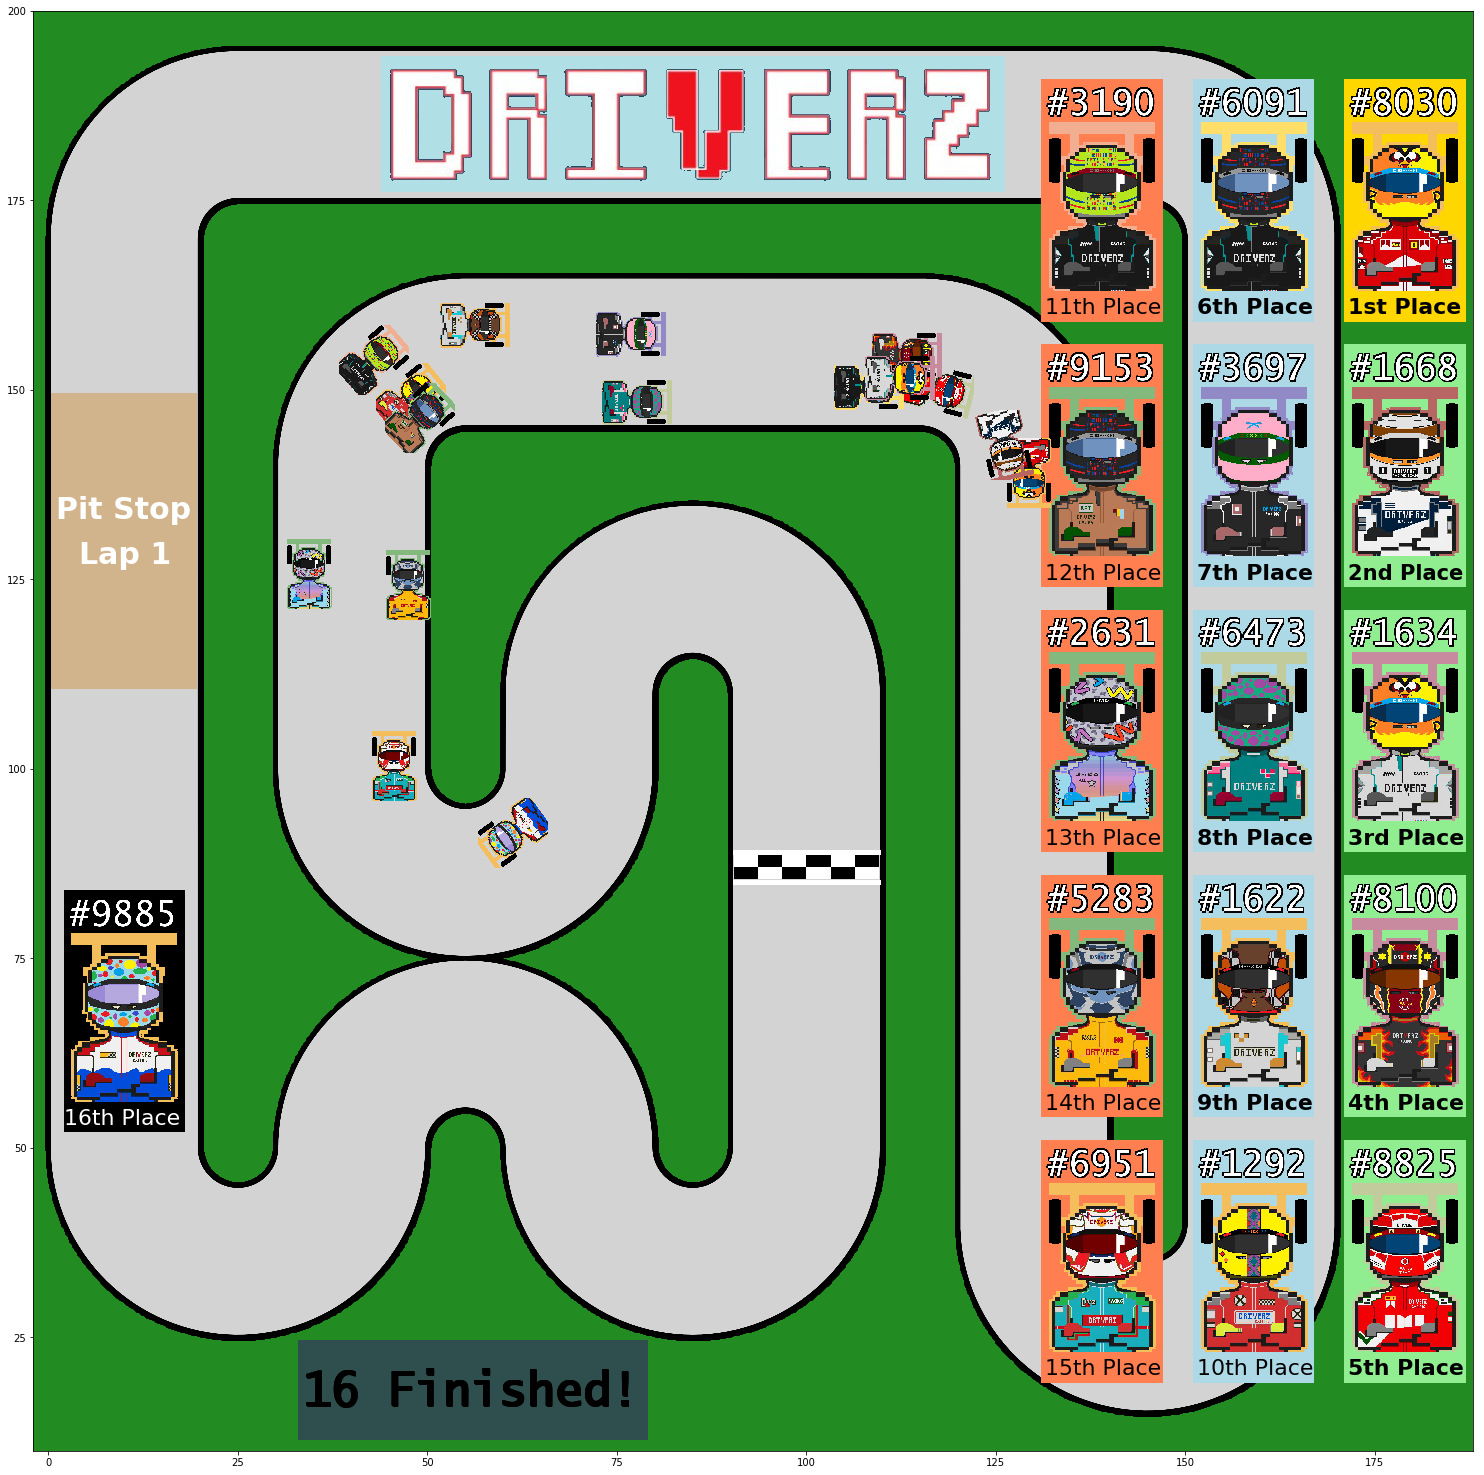

In [24]:
from matplotlib.animation import FuncAnimation
from functools import partial
from scipy import ndimage
from matplotlib import transforms
from PIL import Image
import time
from matplotlib.patches import Rectangle

x1 = [90]
y1 = [80]
x2 = [110]
y2 = [80]
o = 90
fig, ax = plt.subplots(figsize = (20,20))
ax.set_facecolor('forestgreen')
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
track_orient_dict = {}

road_count = 0
track = ['S100', 'L', 'L', 'S100', 'R', 'R', 'S400', 'R', 'S600', 'R', 'S1000', 'L', 'L',
         'S1300', 'L', 'S1200', 'L', 'S1200', 'L', 'L', 'R', 'R', 'L', 'L', 'S300']
for i in [1,2,3]:
    straight(x1,y1,x2,y2,o,100,road_count)
    straight(x1,y1,x2,y2,o,100,road_count)
    for choice in track:
        if choice == 'R':
            for i in range(len(x1), len(x1) + 100):
                track_orient_dict[i] = 'R'
            o, road_count = right90(x1,y1,x2,y2,o,road_count)
        elif choice == 'L':
            for i in range(len(x1), len(x1) + 100):
                track_orient_dict[i] = 'L'
            o, road_count = left90(x1,y1,x2,y2,o,road_count)
        elif choice[0] == 'S':
            num = int(choice[1:])
            road_count = straight(x1,y1,x2,y2,o,num,road_count)
    
plt.scatter(x1, y1, color = 'black')
plt.scatter(x2, y2, color = 'black')

track_dict = {}
for i in range(100):
    count = i + 1
    track_dict[count] = {}
    track_dict[count]['x'] = []
    track_dict[count]['y'] = []
    for i in range(len(x1)):
        track_dict[count]['x'].append( ( x2[i] *  (count/100)) + (x1[i] * ((100-count)/100)) )
        track_dict[count]['y'].append( ( y2[i] *  (count/100)) + (y1[i] * ((100-count)/100)) )

tracko = {}
same_o_list = []
same_count = 0
for i in range(0,24003):
    if i == 0:
        tracko[i] = 0
    elif i in track_orient_dict.keys():
        same_count = 0
        if track_orient_dict[i] == 'L':
            tracko[i] = round(tracko[i-1] + 0.9, 1)
        else:
            tracko[i] = round(tracko[i-1] - 0.9, 1)
    else:
        tracko[i] = round(tracko[i-1], 1)
        same_count += 1
        if same_count > 40:
            same_o_list.append(i)
        
for i in range(1,40):
    try:
        same_o_list.remove(i)
    except:
        continue
    
x1_min = min(x1)
x1_max = max(x1)
x_len = x1_max - x1_min
y1_min = min(y1)
y1_max = max(y1)
y_len = y1_max - y1_min
if x_len > y_len:
    diff = (x_len - y_len) / 2
    ax.set_ylim(y1_min - diff - 25, y1_max + diff + 25)
    ax.set_xlim(x1_min - 17, x1_max + 33)
else:
    diff = (y_len - x_len) / 2
    ax.set_xlim(x1_min - diff - 17, x1_max + diff + 33)
    ax.set_ylim(y1_min - 25, y1_max + 25)
    
plt.plot(track_dict[50]['x'], track_dict[50]['y'], color = 'lightgray', linewidth = 146)
plt.plot(track_dict[50]['x'][6200:6400], track_dict[50]['y'][6200:6400], color = 'tan', linewidth = 146)
plt.plot([track_dict[3]['x'][50], track_dict[97]['x'][50]], [track_dict[3]['y'][50], track_dict[97]['y'][50]], color = 'white', linewidth = 5)
plt.plot([track_dict[3]['x'][90], track_dict[97]['x'][90]], [track_dict[3]['y'][90], track_dict[97]['y'][90]], color = 'white', linewidth = 5)
plt.plot([track_dict[6]['x'][78], track_dict[16]['x'][78]], [track_dict[6]['y'][78], track_dict[16]['y'][78]], color = 'white', linewidth = 12)
plt.plot([track_dict[6]['x'][62], track_dict[16]['x'][62]], [track_dict[6]['y'][62], track_dict[16]['y'][62]], color = 'black', linewidth = 12)
plt.plot([track_dict[22]['x'][78], track_dict[32]['x'][78]], [track_dict[22]['y'][78], track_dict[32]['y'][78]], color = 'black', linewidth = 12)
plt.plot([track_dict[22]['x'][62], track_dict[32]['x'][62]], [track_dict[22]['y'][62], track_dict[32]['y'][62]], color = 'white', linewidth = 12)
plt.plot([track_dict[38]['x'][78], track_dict[48]['x'][78]], [track_dict[38]['y'][78], track_dict[48]['y'][78]], color = 'white', linewidth = 12)
plt.plot([track_dict[38]['x'][62], track_dict[48]['x'][62]], [track_dict[38]['y'][62], track_dict[48]['y'][62]], color = 'black', linewidth = 12)
plt.plot([track_dict[54]['x'][78], track_dict[64]['x'][78]], [track_dict[54]['y'][78], track_dict[64]['y'][78]], color = 'black', linewidth = 12)
plt.plot([track_dict[54]['x'][62], track_dict[64]['x'][62]], [track_dict[54]['y'][62], track_dict[64]['y'][62]], color = 'white', linewidth = 12)
plt.plot([track_dict[70]['x'][78], track_dict[80]['x'][78]], [track_dict[70]['y'][78], track_dict[80]['y'][78]], color = 'white', linewidth = 12)
plt.plot([track_dict[70]['x'][62], track_dict[80]['x'][62]], [track_dict[70]['y'][62], track_dict[80]['y'][62]], color = 'black', linewidth = 12)
plt.plot([track_dict[86]['x'][78], track_dict[94]['x'][78]], [track_dict[86]['y'][78], track_dict[94]['y'][78]], color = 'black', linewidth = 12)
plt.plot([track_dict[86]['x'][62], track_dict[94]['x'][62]], [track_dict[86]['y'][62], track_dict[94]['y'][62]], color = 'white', linewidth = 12)
ax.add_patch(Rectangle((171, 159), 16, 32, facecolor = 'gold'))
ax.add_patch(Rectangle((171, 124), 16, 32, facecolor = 'lightgreen'))
ax.add_patch(Rectangle((171, 89), 16, 32, facecolor = 'lightgreen'))
ax.add_patch(Rectangle((171, 54), 16, 32, facecolor = 'lightgreen'))
ax.add_patch(Rectangle((171, 19), 16, 32, facecolor = 'lightgreen'))
plt.text(1, 133, "Pit Stop", fontsize = 30, fontweight = 'bold', color = 'white')
plt.text(4, 127, "Lap 1", fontsize = 30, fontweight = 'bold', color = 'white')
plt.text(171.5, 160, "1st Place", fontsize = 22, fontweight = 'bold', color = 'black')
plt.text(171.5, 125, "2nd Place", fontsize = 21, fontweight = 'bold', color = 'black')
plt.text(171.5, 90, "3rd Place", fontsize = 22, fontweight = 'bold', color = 'black')
plt.text(171.5, 55, "4th Place", fontsize = 22, fontweight = 'bold', color = 'black')
plt.text(171.5, 20, "5th Place", fontsize = 22, fontweight = 'bold', color = 'black')

def getImage(path, dri, i, angle):
    if driver_loc_dict[dri]['track'][i] < 0:
        if driver_loc_dict[dri]['crash'][i] != 0:
            crash_angle = 36 * driver_loc_dict[dri]['crash'][i]
            input_image = Image.open(path)
            if driver_loc_dict[dri]['crash'][i] % 2 == 0:
                col = 'odd'
            else:
                col = 'even'
            input_image = OnFire(input_image, col)
            output = input_image.rotate(angle)
            try:
                output.save(path.replace('.png', '_fire.png'))
            except:
                time.sleep(5)
                output.save(path.replace('.png', '_fire.png'))
            read_image = plt.imread(path.replace('.png', '_fire.png'), format="png")
        else:
            read_image = plt.imread(path, format="png")
        return OffsetImage(read_image, zoom=.1)
    elif driver_loc_dict[dri]['track'][i] in same_o_list:
        if driver_loc_dict[dri]['crash'][i] != 0:
            crash_angle = 36 * driver_loc_dict[dri]['crash'][i]
            input_image = Image.open(path.replace('.png', '_rot.png'))
            if driver_loc_dict[dri]['crash'][i] % 2 == 0:
                col = 'odd'
            else:
                col = 'even'
            input_image = OnFire(input_image, col)
            output = input_image.rotate(crash_angle)
            try:
                output.save(path.replace('.png', '_fire.png'))
            except:
                time.sleep(5)
                output.save(path.replace('.png', '_fire.png'))
            read_image = plt.imread(path.replace('.png', '_fire.png'), format="png")
        elif driver_loc_dict[dri]['pit_count'][i] != 0:
            input_image = Image.open(path.replace('.png', '_rot.png'))
            pit_length = (driver_loc_dict[dri]['pit_length'] // 3) + 1
            pit_countdown = pit_length - ((driver_loc_dict[dri]['pit_count'][i] + 2) // 3)
            output = OnPit(input_image, pit_countdown)
            try:
                output.save(path.replace('.png', '_pit.png'))
            except:
                time.sleep(5)
                output.save(path.replace('.png', '_pit.png'))
            read_image = plt.imread(path.replace('.png', '_pit.png'), format="png")
        else:
            read_image = plt.imread(path.replace('.png', '_rot.png'), format="png")
        return OffsetImage(read_image, zoom=.1)
    else:
        if driver_loc_dict[dri]['crash'][i] != 0:
            crash_angle = 36 * driver_loc_dict[dri]['crash'][i]
            input_image = Image.open(path.replace('.png', '_rot.png'))
            if driver_loc_dict[dri]['crash'][i] % 2 == 0:
                col = 'odd'
            else:
                col = 'even'
            input_image = OnFire(input_image, col)
            output = input_image.rotate(crash_angle)
            try:
                output.save(path.replace('.png', '_fire.png'))
            except:
                time.sleep(5)
                output.save(path.replace('.png', '_fire.png'))
            read_image = plt.imread(path.replace('.png', '_fire.png'), format="png")
        elif driver_loc_dict[dri]['pit_count'][i] != 0:
            input_image = Image.open(path.replace('.png', '_rot.png'))
            pit_length = (driver_loc_dict[dri]['pit_length'] // 3) + 1
            pit_countdown = pit_length - ((driver_loc_dict[dri]['pit_count'][i] + 2) // 3)
            output = OnPit(input_image, pit_countdown)
            try:
                output.save(path.replace('.png', '_pit.png'))
            except:
                time.sleep(5)
                output.save(path.replace('.png', '_pit.png'))
            read_image = plt.imread(path.replace('.png', '_pit.png'), format="png")
        else:
            input_image = Image.open(path)
            output = input_image.rotate(angle)
            try:
                output.save(path.replace('.png', '_rot.png'))
            except:
                time.sleep(5)
                output.save(path.replace('.png', '_rot.png'))
            read_image = plt.imread(path.replace('.png', '_rot.png'), format="png")
        return OffsetImage(read_image, zoom=.1)

paths = []
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
    paths.append('driverz_'+str(i)+'_edit.png')

rand_1 = [0]
rand_2 = [-100]
rand_3 = [-200]
rand_4 = [-300]

def animate(i):
    if i % 20 == 0:
        print(i)
    while ax.artists != []:
        ax.artists[0].remove()
    first_place = str(driver_loc_dict['leaderboard'][i][0])
    second_place = str(driver_loc_dict['leaderboard'][i][1])
    third_place = str(driver_loc_dict['leaderboard'][i][2])
    fourth_place = str(driver_loc_dict['leaderboard'][i][3])
    fifth_place = str(driver_loc_dict['leaderboard'][i][4])
    
    if driver_loc_dict['lap'][i] == 1:
        ab = AnnotationBbox(OffsetImage(plt.imread('lap1.png', format="png"), zoom=1), (56, 18), frameon=False)
        ax.add_artist(ab)
    elif driver_loc_dict['lap'][i] == 2:
        ab = AnnotationBbox(OffsetImage(plt.imread('lap2.png', format="png"), zoom=1), (56, 18), frameon=False)
        ax.add_artist(ab)
    else:
        num_finished = str(len(driver_loc_dict['driverz_finished'][i]))
        ab = AnnotationBbox(OffsetImage(plt.imread(num_finished+'_finished.png', format="png"), zoom=1), (56, 18), frameon=False)
        ax.add_artist(ab)
    
    ab = AnnotationBbox(OffsetImage(plt.imread('logo_transparent.png', format="png"), zoom=0.8), (85, 185), frameon=False)
    ax.add_artist(ab)
    ab = AnnotationBbox(OffsetImage(plt.imread(first_place+'_leaderboard_img.png', format="png"), zoom=0.24), (179, 177), frameon=False)
    ax.add_artist(ab)
    ab = AnnotationBbox(OffsetImage(plt.imread(second_place+'_leaderboard_img.png', format="png"), zoom=0.24), (179, 142), frameon=False)
    ax.add_artist(ab)
    ab = AnnotationBbox(OffsetImage(plt.imread(third_place+'_leaderboard_img.png', format="png"), zoom=0.24), (179, 107), frameon=False)
    ax.add_artist(ab)
    ab = AnnotationBbox(OffsetImage(plt.imread(fourth_place+'_leaderboard_img.png', format="png"), zoom=0.24), (179, 72), frameon=False)
    ax.add_artist(ab)
    ab = AnnotationBbox(OffsetImage(plt.imread(fifth_place+'_leaderboard_img.png', format="png"), zoom=0.24), (179, 37), frameon=False)
    ax.add_artist(ab)
    
    
    
    
    num_finished = len(driver_loc_dict['driverz_finished'][i])
    #num_finished = 12
    
    s_y = 159
    if num_finished > 5:
        if driver_loc_dict['count_finished'] > 5:
            for place in [6,7,8,9,10,11,12,13,14,15,16]:
                if place in driver_loc_dict['just_finished'][i]:
                    if place == 16:
                        ax.add_patch(Rectangle((2, 52), 16, 32, facecolor = 'black', zorder=3))
                        plt.text(2, 53, "16th Place", fontsize = 22, color = 'white')
                    else:
                        if (place == 11) or (place == 6):
                            s_y = 159
                        elif (place == 12) or (place == 7):
                            s_y = 124
                        elif (place == 13) or (place == 8):
                            s_y = 89
                        elif (place == 14) or (place == 9):
                            s_y = 54
                        elif (place == 15) or (place == 10):
                            s_y = 19
                        if place <= 10:
                            s_x = 151
                        else:
                            s_x = 131
                        if place < 11:
                            ax.add_patch(Rectangle((s_x, s_y), 16, 32, facecolor = 'lightblue', zorder=3))
                        else:
                            ax.add_patch(Rectangle((s_x, s_y), 16, 32, facecolor = 'coral', zorder=3))
                        if place > 9:
                            plt.text(s_x+0.5, s_y+1, str(place)+"th Place", fontsize = 22, color = 'black')
                        else:
                            plt.text(s_x+0.5, s_y+1, str(place)+"th Place", fontweight = 'bold', fontsize = 22, color = 'black')
        
        s_y = 177
        for place in [6,7,8,9,10,11,12,13,14,15,16]:
            if place <= num_finished:
                if place == 16:
                    ab = AnnotationBbox(OffsetImage(plt.imread(str(driver_loc_dict['leaderboard'][i][place-1])+'_leaderboard_img.png', format="png"), zoom=0.24), (10, 70), frameon=False)
                    ax.add_artist(ab)
                else:
                    if place == 11:
                        s_y = 177
                    if place <= 10:
                        s_x = 159
                    else:
                        s_x = 139
                    ab = AnnotationBbox(OffsetImage(plt.imread(str(driver_loc_dict['leaderboard'][i][place-1])+'_leaderboard_img.png', format="png"), zoom=0.24), (s_x, s_y), frameon=False)
                    ax.add_artist(ab)
            s_y -= 35
        
    
    
    for dri in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
        if driver_loc_dict[dri]['track'][i] < 0:
            angle = 'SAME'
        else:
            angle = tracko[driver_loc_dict[dri]['track'][i]]
        ab = AnnotationBbox(getImage(paths[dri-1], dri, i, angle), (driver_loc_dict[dri]['x'][i], driver_loc_dict[dri]['y'][i]), frameon=False)
        ax.add_artist(ab)
    return ax.artists

ani = FuncAnimation(fig, animate, frames = 900, save_count = 0, blit = True)
ani.save('Dec_Grand_Prix.mp4', writer = 'ffmpeg', fps = 11)
plt.show()

In [25]:
print('ayo')

ayo


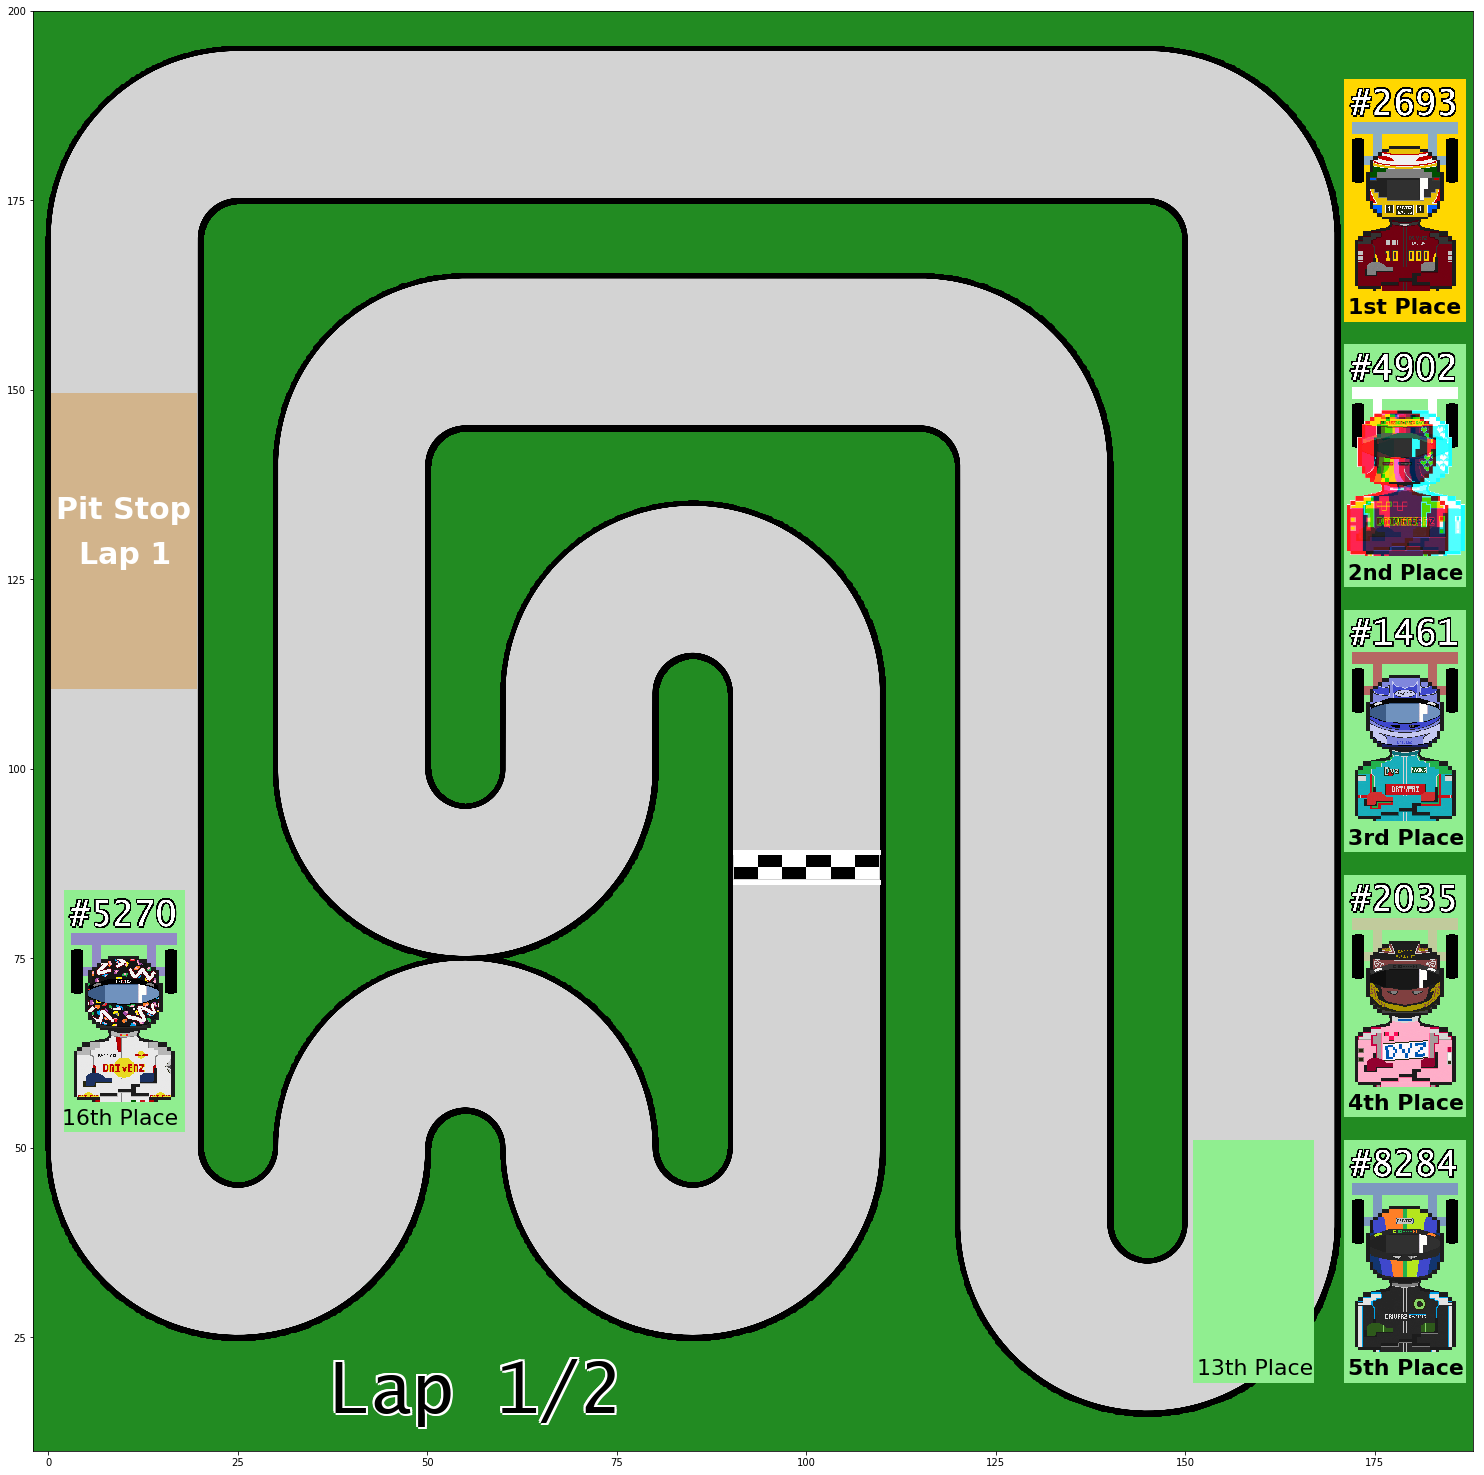

In [108]:
from matplotlib.animation import FuncAnimation
from functools import partial
from scipy import ndimage
from matplotlib import transforms
from PIL import Image
import time
from matplotlib.patches import Rectangle

x1 = [90]
y1 = [80]
x2 = [110]
y2 = [80]
o = 90
fig, ax = plt.subplots(figsize = (20,20))
ax.set_facecolor('forestgreen')
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
track_orient_dict = {}

road_count = 0
track = ['S100', 'L', 'L', 'S100', 'R', 'R', 'S400', 'R', 'S600', 'R', 'S1000', 'L', 'L',
         'S1300', 'L', 'S1200', 'L', 'S1200', 'L', 'L', 'R', 'R', 'L', 'L', 'S300']
for i in [1,2,3]:
    straight(x1,y1,x2,y2,o,100,road_count)
    straight(x1,y1,x2,y2,o,100,road_count)
    for choice in track:
        if choice == 'R':
            for i in range(len(x1), len(x1) + 100):
                track_orient_dict[i] = 'R'
            o, road_count = right90(x1,y1,x2,y2,o,road_count)
        elif choice == 'L':
            for i in range(len(x1), len(x1) + 100):
                track_orient_dict[i] = 'L'
            o, road_count = left90(x1,y1,x2,y2,o,road_count)
        elif choice[0] == 'S':
            num = int(choice[1:])
            road_count = straight(x1,y1,x2,y2,o,num,road_count)
    
plt.scatter(x1, y1, color = 'black')
plt.scatter(x2, y2, color = 'black')

track_dict = {}
for i in range(100):
    count = i + 1
    track_dict[count] = {}
    track_dict[count]['x'] = []
    track_dict[count]['y'] = []
    for i in range(len(x1)):
        track_dict[count]['x'].append( ( x2[i] *  (count/100)) + (x1[i] * ((100-count)/100)) )
        track_dict[count]['y'].append( ( y2[i] *  (count/100)) + (y1[i] * ((100-count)/100)) )

tracko = {}
same_o_list = []
same_count = 0
for i in range(0,24003):
    if i == 0:
        tracko[i] = 0
    elif i in track_orient_dict.keys():
        same_count = 0
        if track_orient_dict[i] == 'L':
            tracko[i] = round(tracko[i-1] + 0.9, 1)
        else:
            tracko[i] = round(tracko[i-1] - 0.9, 1)
    else:
        tracko[i] = round(tracko[i-1], 1)
        same_count += 1
        if same_count > 40:
            same_o_list.append(i)
        
for i in range(1,40):
    try:
        same_o_list.remove(i)
    except:
        continue
    
x1_min = min(x1)
x1_max = max(x1)
x_len = x1_max - x1_min
y1_min = min(y1)
y1_max = max(y1)
y_len = y1_max - y1_min
if x_len > y_len:
    diff = (x_len - y_len) / 2
    ax.set_ylim(y1_min - diff - 25, y1_max + diff + 25)
    ax.set_xlim(x1_min - 17, x1_max + 33)
else:
    diff = (y_len - x_len) / 2
    ax.set_xlim(x1_min - diff - 17, x1_max + diff + 33)
    ax.set_ylim(y1_min - 25, y1_max + 25)
    
plt.plot(track_dict[50]['x'], track_dict[50]['y'], color = 'lightgray', linewidth = 146)
plt.plot(track_dict[50]['x'][6200:6400], track_dict[50]['y'][6200:6400], color = 'tan', linewidth = 146)
plt.plot([track_dict[3]['x'][50], track_dict[97]['x'][50]], [track_dict[3]['y'][50], track_dict[97]['y'][50]], color = 'white', linewidth = 5)
plt.plot([track_dict[3]['x'][90], track_dict[97]['x'][90]], [track_dict[3]['y'][90], track_dict[97]['y'][90]], color = 'white', linewidth = 5)
plt.plot([track_dict[6]['x'][78], track_dict[16]['x'][78]], [track_dict[6]['y'][78], track_dict[16]['y'][78]], color = 'white', linewidth = 12)
plt.plot([track_dict[6]['x'][62], track_dict[16]['x'][62]], [track_dict[6]['y'][62], track_dict[16]['y'][62]], color = 'black', linewidth = 12)
plt.plot([track_dict[22]['x'][78], track_dict[32]['x'][78]], [track_dict[22]['y'][78], track_dict[32]['y'][78]], color = 'black', linewidth = 12)
plt.plot([track_dict[22]['x'][62], track_dict[32]['x'][62]], [track_dict[22]['y'][62], track_dict[32]['y'][62]], color = 'white', linewidth = 12)
plt.plot([track_dict[38]['x'][78], track_dict[48]['x'][78]], [track_dict[38]['y'][78], track_dict[48]['y'][78]], color = 'white', linewidth = 12)
plt.plot([track_dict[38]['x'][62], track_dict[48]['x'][62]], [track_dict[38]['y'][62], track_dict[48]['y'][62]], color = 'black', linewidth = 12)
plt.plot([track_dict[54]['x'][78], track_dict[64]['x'][78]], [track_dict[54]['y'][78], track_dict[64]['y'][78]], color = 'black', linewidth = 12)
plt.plot([track_dict[54]['x'][62], track_dict[64]['x'][62]], [track_dict[54]['y'][62], track_dict[64]['y'][62]], color = 'white', linewidth = 12)
plt.plot([track_dict[70]['x'][78], track_dict[80]['x'][78]], [track_dict[70]['y'][78], track_dict[80]['y'][78]], color = 'white', linewidth = 12)
plt.plot([track_dict[70]['x'][62], track_dict[80]['x'][62]], [track_dict[70]['y'][62], track_dict[80]['y'][62]], color = 'black', linewidth = 12)
plt.plot([track_dict[86]['x'][78], track_dict[94]['x'][78]], [track_dict[86]['y'][78], track_dict[94]['y'][78]], color = 'black', linewidth = 12)
plt.plot([track_dict[86]['x'][62], track_dict[94]['x'][62]], [track_dict[86]['y'][62], track_dict[94]['y'][62]], color = 'white', linewidth = 12)
ax.add_patch(Rectangle((171, 159), 16, 32, facecolor = 'gold'))
ax.add_patch(Rectangle((171, 124), 16, 32, facecolor = 'lightgreen'))
ax.add_patch(Rectangle((171, 89), 16, 32, facecolor = 'lightgreen'))
ax.add_patch(Rectangle((171, 54), 16, 32, facecolor = 'lightgreen'))
ax.add_patch(Rectangle((171, 19), 16, 32, facecolor = 'lightgreen'))
plt.text(171.5, 160, "1st Place", fontsize = 22, fontweight = 'bold', color = 'black')
plt.text(171.5, 125, "2nd Place", fontsize = 21, fontweight = 'bold', color = 'black')
plt.text(171.5, 90, "3rd Place", fontsize = 22, fontweight = 'bold', color = 'black')
plt.text(171.5, 55, "4th Place", fontsize = 22, fontweight = 'bold', color = 'black')
plt.text(171.5, 20, "5th Place", fontsize = 22, fontweight = 'bold', color = 'black')
plt.text(1, 133, "Pit Stop", fontsize = 30, fontweight = 'bold', color = 'white')
plt.text(4, 127, "Lap 1", fontsize = 30, fontweight = 'bold', color = 'white')
ab = AnnotationBbox(OffsetImage(plt.imread('3_leaderboard_img.png', format="png"), zoom=0.24), (179, 177), frameon=False)
ax.add_artist(ab)
ab = AnnotationBbox(OffsetImage(plt.imread('16_leaderboard_img.png', format="png"), zoom=0.24), (179, 142), frameon=False)
ax.add_artist(ab)
ab = AnnotationBbox(OffsetImage(plt.imread('6_leaderboard_img.png', format="png"), zoom=0.24), (179, 107), frameon=False)
ax.add_artist(ab)
ab = AnnotationBbox(OffsetImage(plt.imread('1_leaderboard_img.png', format="png"), zoom=0.24), (179, 72), frameon=False)
ax.add_artist(ab)
ab = AnnotationBbox(OffsetImage(plt.imread('4_leaderboard_img.png', format="png"), zoom=0.24), (179, 37), frameon=False)
ax.add_artist(ab)
ab = AnnotationBbox(OffsetImage(plt.imread('lap1.png', format="png"), zoom=1), (56, 18), frameon=False)
ax.add_artist(ab)

ax.add_patch(Rectangle((151, 19), 16, 32, facecolor = 'lightgreen', zorder=3))
plt.text(151.5, 20, "13th Place", fontsize = 22, color = 'black')

ax.add_patch(Rectangle((2, 52), 16, 32, facecolor = 'lightgreen', zorder=3))
plt.text(1.8, 53, "16th Place", fontsize = 22, color = 'black')
ab = AnnotationBbox(OffsetImage(plt.imread('11_leaderboard_img.png', format="png"), zoom=0.24), (10, 70), frameon=False)
ax.add_artist(ab)

plt.show()

In [ ]:
plt.text(1.5, 53, "16th Place", fontsize = 22, color = 'black')

In [269]:
# Imports PIL module 
from PIL import Image
  
# open method used to open different extension image file
for pic_i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
    numy = str(pic_i)
    im = Image.open('driver_'+numy+'.jpg') 

    imga = im.convert("RGBA")
    datas = imga.getdata()

    newData = list()
    r,g,b,t = datas[0]
    count = 0
    row = 1
    for item in datas:
        if item[0] == r and item[1] == g and item[2] == b and item[3] == t:
            if ((count > 570) or (count < 130)) and (row < 50):
                newData.append((0, 0, 0, 0))
            elif (count <= 180 and count > 130) and (row > 70 and row <= 246):
                newData.append((0,0,0,255))
            elif (count <= 174 and count > 136) and (row > 246 and row <= 249):
                newData.append((0,0,0,255))
            elif (count <= 168 and count > 142) and (row > 249 and row <= 252):
                newData.append((0,0,0,255))
            elif (count <= 174 and count > 136) and (row > 67 and row <= 70):
                newData.append((0,0,0,255))
            elif (count <= 168 and count > 142) and (row > 64 and row <= 67):
                newData.append((0,0,0,255))
            elif (count >= (700-180) and count < (700-130)) and (row > 70 and row <= 246):
                newData.append((0,0,0,255))
            elif (count >= (700-174) and count < (700-136)) and (row > 246 and row <= 249):
                newData.append((0,0,0,255))
            elif (count >= (700-168) and count < (700-142)) and (row > 249 and row <= 252):
                newData.append((0,0,0,255))
            elif (count >= (700-174) and count < (700-136)) and (row > 67 and row <= 70):
                newData.append((0,0,0,255))
            elif (count >= (700-168) and count < (700-142)) and (row > 64 and row <= 67):
                newData.append((0,0,0,255))
            elif ((count > 481) or (count < 217)) and (row >= 50 and row < 140):
                newData.append((0, 0, 0, 0))
            elif ((count < 445) and (count > 253)) and (row >= 50 and row < 140):
                newData.append((0, 0, 0, 0))
            elif (count > 160 and count < 540) and (row > 140 and row <= 176):
                newData.append((r,g,b,t))
            elif row >= 140:
                newData.append((0, 0, 0, 0))
            else:
                newData.append(item)
        else:
            newData.append(item)
        count += 1
        if count == 700:
            count = 0
            row += 1

    im.putdata(newData)
    im.save('driverz_'+numy+'_edit.png')
    im

In [336]:
def MakeOutline(d, text, x, y, outline, size, font, outside_color, inside_color):
    d.multiline_text((x + outline, y), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x - outline, y), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x, y + outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x, y - outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x + outline, y + outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x + outline, y - outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x - outline, y - outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x - outline, y - outline), text, font=ImageFont.truetype(font, size), fill = outside_color)
    d.multiline_text((x, y), text, font=ImageFont.truetype(font, size), fill = inside_color)

In [65]:
from PIL import Image
for driverz in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
    lap = 3
    img = Image.new('RGB', size = (350,100), color = 'forestgreen')
    I1 = ImageDraw.Draw(img)
    myFont = ImageFont.truetype('arial', 265)
    if lap == 1:
        MakeOutline(I1, 'Lap 1', 70, 5, 2, 70, 'LTYPE.TTF', 'white', 'black')
    if lap == 2:
        MakeOutline(I1, 'Lap 2', 70, 5, 2, 70, 'LTYPE.TTF', 'white', 'black')
    if lap > 2:
        MakeOutline(I1, str(driverz)+' driverz finished', 5, 30, 1, 30, 'LTYPE.TTF', 'black', 'black')
    img.save(str(driverz)+'_finished.png')

In [79]:
lap = 3
for driverz in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
    img = Image.new('RGB', size = (350,100), color = 'forestgreen')
    I1 = ImageDraw.Draw(img)
    myFont = ImageFont.truetype('arial', 265)
    if lap == 1:
        MakeOutline(I1, 'Lap 1', 70, 5, 2, 70, 'LTYPE.TTF', 'white', 'black')
    if lap == 2:
        MakeOutline(I1, 'Lap 2', 70, 5, 2, 70, 'LTYPE.TTF', 'white', 'black')
    if lap > 2:
        MakeOutline(I1, str(driverz)+' Finished!', 5, 20, 1, 47, 'LTYPE.TTF', 'black', 'black')
    img.save(str(driverz)+'_finished.png')

In [227]:
def CreateLeaderboardPic(number):
    nft_id = '#'+str(int(stats_dict['ID'][number]))
    img = Image.open('driverz_'+str(number)+'_edit.png')
    img = img.crop( (0,-180,img.width,img.height) )  
    I1 = ImageDraw.Draw(img)
    myFont = ImageFont.truetype('arial', 265)

    # Add Text to an image
    if len(nft_id) == 5:
        MakeOutline(I1, nft_id, 120, 5, 6, 150, 'LTYPE.TTF', 'black', 'white')
    elif len(nft_id) == 4:
        MakeOutline(I1, nft_id, 160, 5, 6, 150, 'LTYPE.TTF', 'black', 'white')
    elif len(nft_id) == 3:
        MakeOutline(I1, nft_id, 205, 5, 6, 150, 'LTYPE.TTF', 'black', 'white')
    elif len(nft_id) == 2:
        MakeOutline(I1, nft_id, 245, 5, 6, 150, 'LTYPE.TTF', 'black', 'white')
    img.save(str(number)+'_leaderboard_img.png')

In [228]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
    CreateLeaderboardPic(i)

In [294]:
# importing image object from PIL
from PIL import Image, ImageOps
# creating an image object
def OnPit(im, counter):
    # image colorize function
    if col == 'odd':
        imga = ImageOps.colorize(img, black ="yellow", white ="red").convert('RGBA')
    else:
        imga = ImageOps.colorize(img, black ="red", white ="yellow").convert('RGBA')
    datas = imga.getdata()

    newData = list()
    r,g,b,t = datas[5]
    count = 0
    row = 1
    for item in datas:
        if item[0] <= r+30 and (item[1] >= g - 30 and item[1] <= g + 30) and (item[2] >= b - 30 and item[2] <= b + 30):
            newData.append((211, 211, 211, 0))
        else:
            newData.append(item)

    im.putdata(newData)
    return im

0 80 107 255


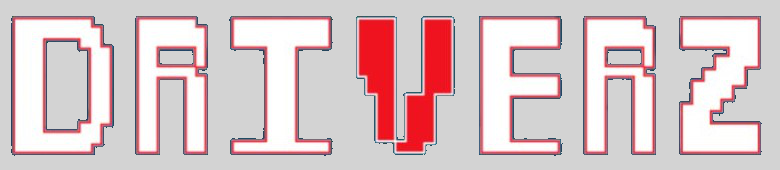

In [72]:
numy = str(pic_i)
im = Image.open('driverz_logo'+'.jpg') 

imga = im.convert("RGBA")
datas = imga.getdata()

newData = list()
r,g,b,t = datas[5]
print(r,g,b,t)
count = 0
row = 1
for item in datas:
    if item[0] <= r+30 and (item[1] >= g - 30 and item[1] <= g + 30) and (item[2] >= b - 30 and item[2] <= b + 30):
        newData.append((211, 211, 211, 0))
    else:
        newData.append(item)

im.putdata(newData)
im.save('logo_transparent.png')
im

In [83]:
import aspose.words as aw
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

doc = aw.Document()
builder = aw.DocumentBuilder(doc)

shape = builder.insert_image("driver_1.jpg")
shape.image_data.save("driver_1.svg")

In [86]:
import matplotlib as mpl
from svgpathtools import svg2paths
from svgpath2mpl import parse_path

driver_path, attributes = svg2paths('driver_1.svg')
driver_marker = parse_path(attributes[0]['d'])
driver_marker.vertices -= driver_marker.vertices.mean(axis=0)
#driver_marker = driver_marker.transformed(mpl.transforms.Affine2D().rotate_deg(180))
#driver_marker = driver_marker.transformed(mpl.transforms.Affine2D().scale(-1,1))

ExpatError: not well-formed (invalid token): line 1, column 0

In [ ]:
y1[]

In [ ]:
len(y2)

In [25]:
listy = [1,2,3]
listy.append(a)

In [27]:
b

array([ 0.00000000e+00, -6.29361631e-04, -2.51728808e-03, -5.66330408e-03,
       -1.00666176e-02, -1.57261202e-02, -2.26403871e-02, -3.08076777e-02,
       -4.02259358e-02, -5.08927906e-02, -6.28055566e-02, -7.59612349e-02,
       -9.03565137e-02, -1.05987769e-01, -1.22851066e-01, -1.40942158e-01,
       -1.60256493e-01, -1.80789207e-01, -2.02535132e-01, -2.25488793e-01,
       -2.49644411e-01, -2.74995906e-01, -3.01536896e-01, -3.29260699e-01,
       -3.58160335e-01, -3.88228529e-01, -4.19457713e-01, -4.51840023e-01,
       -4.85367309e-01, -5.20031129e-01, -5.55822757e-01, -5.92733183e-01,
       -6.30753115e-01, -6.69872981e-01, -7.10082934e-01, -7.51372850e-01,
       -7.93732336e-01, -8.37150727e-01, -8.81617093e-01, -9.27120240e-01,
       -9.73648712e-01, -1.02119080e+00, -1.06973453e+00, -1.11926768e+00,
       -1.16977778e+00, -1.22125213e+00, -1.27367775e+00, -1.32704146e+00,
       -1.38132981e+00, -1.43652914e+00, -1.49262556e+00, -1.54960494e+00,
       -1.60745294e+00, -